(-0.5, 357.5, 424.5, -0.5)

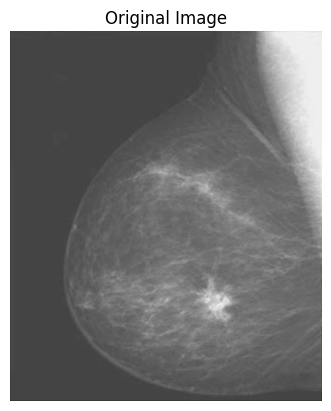

In [25]:
# Notation: 
# r – pixel intensity of the input image; 
# s - pixel intensity of the transformed image; 
# L – the maximum intensity of the input image (e.g., L = 256 for an 8-bit grayscale image)

import cv2
import numpy as np
import matplotlib.pyplot as plt

# get mammogram image
img = cv2.imread('Mammogram.png')

# define maximum intensity of the input range
L = 256

# show image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

(-0.5, 357.5, 424.5, -0.5)

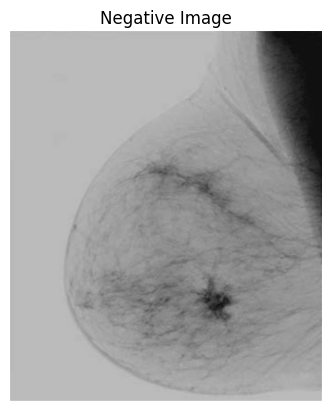

In [26]:
# 5.1 Given the mammogram image 𝐼 (‘Mammogram.png’), compute its negative image 𝐼𝑛, using 𝑠 = (𝐿 − 1) − 𝑟. (1pt)

def negativeImage(image):
    r = image
    return (L - 1) - r

# compute its negative image
negativeImg = negativeImage(img)

# show image
plt.imshow(negativeImg)
plt.title('Negative Image')
plt.axis('off')

(-0.5, 357.5, 424.5, -0.5)

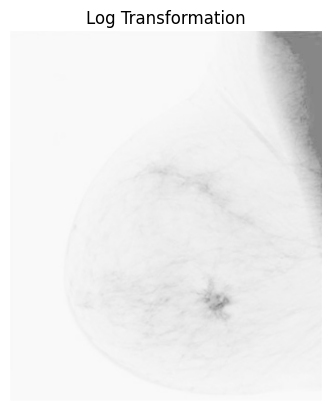

In [27]:
# 5.2 Apply log transformation onto the negative image 𝐼𝑛, i.e., 𝑠 = log (1 + 𝑟). (1pt)

def logTransformation(image):
    # type conversion required for log transformation
    # uint8 -> float32
    r = image.astype(np.float32)
    return np.log(1 + r)

# apply log transformation onto the negative image
logTransformImg = logTransformation(negativeImg)

# pixel intensities are decimals. MatPlotLib requires integers
# scale the pixel intensities to the range [0, L-1]
logTransformImg = (logTransformImg / np.max(logTransformImg)) * (L-1)

# convert the pixel intensity values to uint8
logTransformImg = logTransformImg.astype(np.uint8)

# show image
plt.imshow(logTransformImg)
plt.title('Log Transformation')
plt.axis('off')

(-0.5, 357.5, 424.5, -0.5)

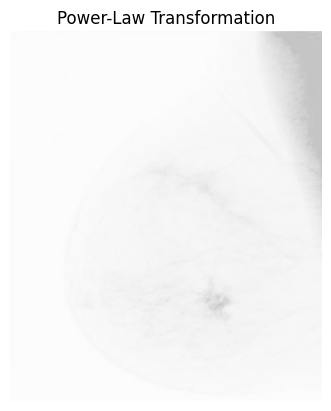

In [28]:
# 5.3 Apply power-law transformation onto the negative image 𝐼𝑛, i.e., 𝑠 = 𝑟𝛾. You can choose different 𝛾 to test it (e.g.,𝛾 = 0.1). (1pt)

def powerLawTransformation(image, gamma):
    # type conversion required for power-law transformation
    # uint8 -> float32
    r = image.astype(np.float32)
    return np.power(r, gamma)

# apply power-law transformation onto the negative image
INPUT_GAMMA_VALUE = 0.1
powerLawImg = powerLawTransformation(negativeImg, INPUT_GAMMA_VALUE)

# pixel intensities are decimals. MatPlotLib requires integers
# scale the pixel intensities to the range [0, L-1]
powerLawImg = (powerLawImg / np.max(powerLawImg)) * (L-1)

# convert the pixel intensity values to uint8
powerLawImg = powerLawImg.astype(np.uint8)

# show image
plt.imshow(powerLawImg)
plt.title('Power-Law Transformation')
plt.axis('off')

(-0.5, 357.5, 424.5, -0.5)

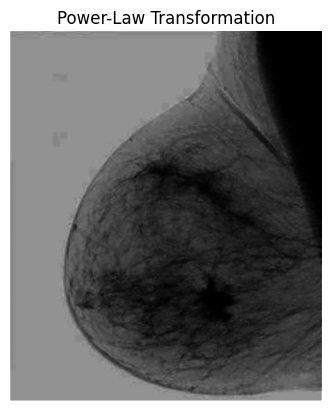

In [29]:
# Testing other values for gamma

INPUT_GAMMA_VALUE = 5.0
powerLawImg = powerLawTransformation(negativeImg, INPUT_GAMMA_VALUE)

# pixel intensities are decimals. MatPlotLib requires integers
# scale the pixel intensities to the range [0, L-1]
powerLawImg = (powerLawImg / np.max(powerLawImg)) * (L-1)

# convert the pixel intensity values to uint8
powerLawImg = powerLawImg.astype(np.uint8)

# show image
plt.imshow(powerLawImg)
plt.title('Power-Law Transformation')
plt.axis('off')

(-0.5, 357.5, 424.5, -0.5)

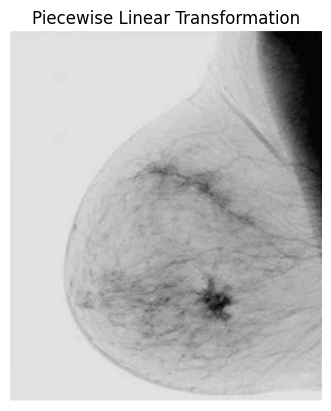

In [30]:
# 5.4 Apply the following piecewise linear transform for the contrast stretch on the negative image 𝐼𝑛. (2 pts)

def piecewiseLinearTransform(image):
    r = image.astype(np.float32)
    imgMin = np.min(r)
    imgMax = np.max(r)

    # the piecewise linear transformation was given and is therefore hardcoded as:
    slope = (L-1) / (imgMax - imgMin)

    imgTransformed = (image - imgMin) * slope
    return imgTransformed

#apply piecewise linear transformation onto the negative image
piecewiseLinearTransformImg = piecewiseLinearTransform(negativeImg)

# pixel intensities are decimals. MatPlotLib requires integers
# scale the pixel intensities to the range [0, L-1]
piecewiseLinearTransformImg = (piecewiseLinearTransformImg / np.max(piecewiseLinearTransformImg)) * (L-1)

# convert the pixel intensity values to uint8
piecewiseLinearTransformImg = piecewiseLinearTransformImg.astype(np.uint8)

# show image
plt.imshow(piecewiseLinearTransformImg)
plt.title('Piecewise Linear Transformation')
plt.axis('off')